# Starbucks Beverage Nutrition — Data Storytelling
**Author:** Suniksha Gupta  
**Project:** Data Science Foundations — Craft a Story from a Dataset  
**Format:** Jupyter Notebook (markdown + code)  

**Goal:** Explore Starbucks beverage nutrition to identify high-calorie items, nutritional drivers (sugar, fat, size), and actionable recommendations for customers and business stakeholders.

**Audience:** Executive / Non-technical (clear insights + visuals)

<!-- ======================
Imports & Load Data (code)
====================== -->

Import & Load Data
============================================

In [13]:
# importing libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
# pd.set_option('max_columns', 100)

In [14]:
# Load data
starbucks_drinks = pd.read_csv(
    r"D:/Data_Science/Starbucks Project for data storytelling/archive/starbucks_drinkMenu_expanded.csv"
)

Inspect data
======================

In [15]:
# Quick peek at the data
starbucks_drinks.head()

,Beverage_category,Beverage,Beverage_prep,Calories,Total Fat (g),Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g),Vitamin A (% DV),Vitamin C (% DV),Calcium (% DV),Iron (% DV),Caffeine (mg)
0,Coffee,Brewed Coffee,Short,3,0.1,0.0,0.0,0,5,0,0,0,0.3,0%,0%,0%,0%,175
1,Coffee,Brewed Coffee,Tall,4,0.1,0.0,0.0,0,10,0,0,0,0.5,0%,0%,0%,0%,260
2,Coffee,Brewed Coffee,Grande,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0%,0%,0%,0%,330
3,Coffee,Brewed Coffee,Venti,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0%,0%,2%,0%,410
4,Classic Espresso Drinks,Caffè Latte,Short Nonfat Milk,70,0.1,0.1,0.0,5,75,10,0,9,6.0,10%,0%,20%,0%,75


In [16]:
# Info and summary
starbucks_drinks.info()
starbucks_drinks.shape
starbucks_drinks.describe(include='all').T

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242 entries, 0 to 241
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Beverage_category          242 non-null    object 
 1   Beverage                   242 non-null    object 
 2   Beverage_prep              242 non-null    object 
 3   Calories                   242 non-null    int64  
 4    Total Fat (g)             242 non-null    object 
 5   Trans Fat (g)              242 non-null    float64
 6   Saturated Fat (g)          242 non-null    float64
 7    Sodium (mg)               242 non-null    int64  
 8    Total Carbohydrates (g)   242 non-null    int64  
 9   Cholesterol (mg)           242 non-null    int64  
 10   Dietary Fibre (g)         242 non-null    int64  
 11   Sugars (g)                242 non-null    int64  
 12   Protein (g)               242 non-null    float64
 13  Vitamin A (% DV)           242 non-null    object 

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Beverage_category,242,9,Classic Espresso Drinks,58,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Beverage,242,33,Tazo® Full-Leaf Red Tea Latte (Vanilla Rooibos),12,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Beverage_prep,242,13,Soymilk,66,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Calories,242.0,NaN,NaN,NaN,193.871901,102.863303,0.0,120.0,185.0,260.0,510.0
Total Fat (g),242,24,0.1,34,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Trans Fat (g),242.0,NaN,NaN,NaN,1.307025,1.640259,0.0,0.1,0.5,2.0,9.0
Saturated Fat (g),242.0,NaN,NaN,NaN,0.037603,0.071377,0.0,0.0,0.0,0.1,0.3
Sodium (mg),242.0,NaN,NaN,NaN,6.363636,8.630257,0.0,0.0,5.0,10.0,40.0
Total Carbohydrates (g),242.0,NaN,NaN,NaN,128.884298,82.303223,0.0,70.0,125.0,170.0,340.0
Cholesterol (mg),242.0,NaN,NaN,NaN,35.991736,20.795186,0.0,21.0,34.0,50.75,90.0


Data wrangling
======================

## Data wrangling steps
1. Normalize column names (strip spaces).  
2. Ensure `% DV` columns and numeric columns are numeric.  
3. Inspect and handle missing values (Caffeine has some).
4. Checking for duplicate values, if any 

In [17]:
# Check missing values
starbucks_drinks.isnull().sum()

Beverage_category            0
Beverage                     0
Beverage_prep                0
Calories                     0
 Total Fat (g)               0
Trans Fat (g)                0
Saturated Fat (g)            0
 Sodium (mg)                 0
 Total Carbohydrates (g)     0
Cholesterol (mg)             0
 Dietary Fibre (g)           0
 Sugars (g)                  0
 Protein (g)                 0
Vitamin A (% DV)             0
Vitamin C (% DV)             0
 Calcium (% DV)              0
Iron (% DV)                  0
Caffeine (mg)                1
dtype: int64

In [18]:
df=starbucks_drinks

In [19]:
df['Caffeine (mg)'] = df['Caffeine (mg)'].fillna(0)

**Handling missing values:**  
- `Caffeine (mg)` has missing values (for some drinks, caffeine is not applicable). We will fill the missing values with 0


In [20]:
starbucks_drinks.isnull().sum()

Beverage_category            0
Beverage                     0
Beverage_prep                0
Calories                     0
 Total Fat (g)               0
Trans Fat (g)                0
Saturated Fat (g)            0
 Sodium (mg)                 0
 Total Carbohydrates (g)     0
Cholesterol (mg)             0
 Dietary Fibre (g)           0
 Sugars (g)                  0
 Protein (g)                 0
Vitamin A (% DV)             0
Vitamin C (% DV)             0
 Calcium (% DV)              0
Iron (% DV)                  0
Caffeine (mg)                0
dtype: int64

In [21]:
#assigning data
df = starbucks_drinks

In [22]:
# Checking dtypes
df.dtypes

Beverage_category             object
Beverage                      object
Beverage_prep                 object
Calories                       int64
 Total Fat (g)                object
Trans Fat (g)                float64
Saturated Fat (g)            float64
 Sodium (mg)                   int64
 Total Carbohydrates (g)       int64
Cholesterol (mg)               int64
 Dietary Fibre (g)             int64
 Sugars (g)                    int64
 Protein (g)                 float64
Vitamin A (% DV)              object
Vitamin C (% DV)              object
 Calcium (% DV)               object
Iron (% DV)                   object
Caffeine (mg)                 object
dtype: object

In [23]:
# show columns
df.columns

Index(['Beverage_category', 'Beverage', 'Beverage_prep', 'Calories',
       ' Total Fat (g)', 'Trans Fat (g) ', 'Saturated Fat (g)', ' Sodium (mg)',
       ' Total Carbohydrates (g) ', 'Cholesterol (mg)', ' Dietary Fibre (g)',
       ' Sugars (g)', ' Protein (g) ', 'Vitamin A (% DV) ', 'Vitamin C (% DV)',
       ' Calcium (% DV) ', 'Iron (% DV) ', 'Caffeine (mg)'],
      dtype='object')

In [24]:
# Strip whitespace in column names
df.columns = df.columns.str.strip()

In [25]:
#removing % from 'Vitamin A (% DV)', 'Calcium (% DV)', 'Iron (% DV)', 'Vitamin C (% DV)'
cols = ['Vitamin A (% DV)', 'Vitamin C (% DV)', 'Calcium (% DV)', 'Iron (% DV)']

for col in cols:
      df[col] = df[col].astype(str).str.replace('%', '', regex=False)

df[col] = pd.to_numeric(df[col], errors='coerce')  # converts invalid entries to NaN

In [26]:
# Convert numeric cols 
cols = ['Vitamin A (% DV)', 'Vitamin C (% DV)', 'Calcium (% DV)', 'Caffeine (mg)', 'Total Fat (g)']

for col in cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')
# df['Caffeine (mg)'] = pd.to_numeric(df['Caffeine (mg)'], errors='coerce')
# df[' Total Fat (g)'] = pd.to_numeric(df[' Total Fat (g)'], errors='coerce')

In [27]:
# Confirm dtypes
df.dtypes

Beverage_category           object
Beverage                    object
Beverage_prep               object
Calories                     int64
Total Fat (g)              float64
Trans Fat (g)              float64
Saturated Fat (g)          float64
Sodium (mg)                  int64
Total Carbohydrates (g)      int64
Cholesterol (mg)             int64
Dietary Fibre (g)            int64
Sugars (g)                   int64
Protein (g)                float64
Vitamin A (% DV)             int64
Vitamin C (% DV)             int64
Calcium (% DV)               int64
Iron (% DV)                float64
Caffeine (mg)              float64
dtype: object

In [28]:
#checking for duplicates, if any
(df.duplicated().sum())

0

In [29]:
df.head()

,Beverage_category,Beverage,Beverage_prep,Calories,Total Fat (g),Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g),Vitamin A (% DV),Vitamin C (% DV),Calcium (% DV),Iron (% DV),Caffeine (mg)
0,Coffee,Brewed Coffee,Short,3,0.1,0.0,0.0,0,5,0,0,0,0.3,0,0,0,0.0,175.0
1,Coffee,Brewed Coffee,Tall,4,0.1,0.0,0.0,0,10,0,0,0,0.5,0,0,0,0.0,260.0
2,Coffee,Brewed Coffee,Grande,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0,0,0,0.0,330.0
3,Coffee,Brewed Coffee,Venti,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0,0,2,0.0,410.0
4,Classic Espresso Drinks,Caffè Latte,Short Nonfat Milk,70,0.1,0.1,0.0,5,75,10,0,9,6.0,10,0,20,0.0,75.0


Questions & Hypothesis
======================

## Questions to answer
1. Which specific beverages have the highest calories? (Top 10)  
2. Which beverage categories are the most calorie-dense on average?  
3. Is sugar the primary driver of calories? (correlation & regression)  
4. How does size affect calories?  
5. How does caffeine relate to calories (are high-calorie drinks high in caffeine)?

### Hypothesis
**H0 (hypothesis):** Calorie content is primarily driven by sugar content and by beverage size.  
We will test this using correlation and a simple linear regression (Calories ~ Sugars + Size_Level).

EDA: Distributions
======================

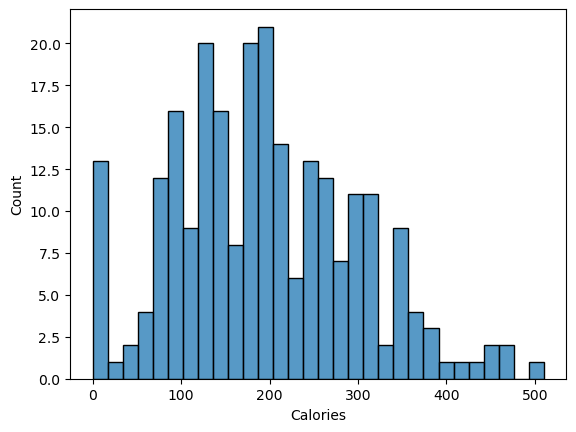

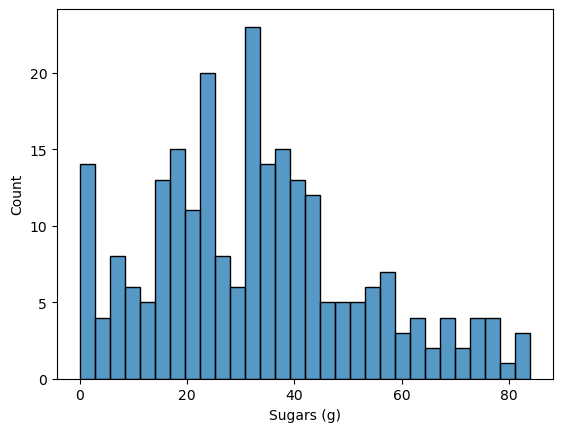

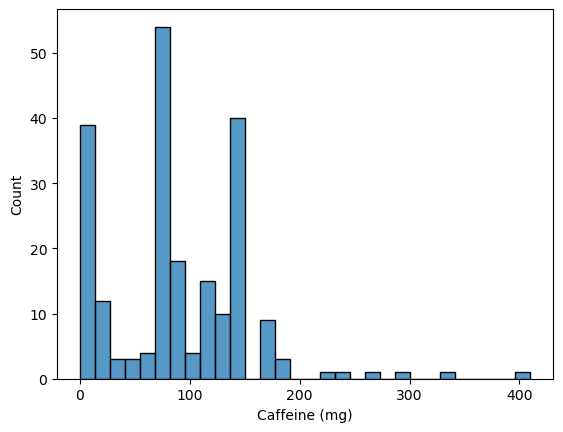

<Axes: xlabel='count', ylabel='Beverage_category'>

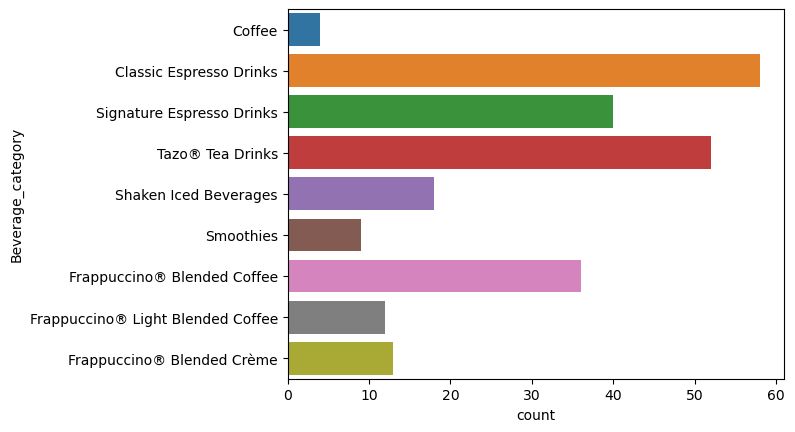

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram of Calories
sns.histplot(df['Calories'], bins=30)
plt.show()

# Histogram of Sugars
sns.histplot(df['Sugars (g)'], bins=30)
plt.show()

# Histogram of Caffeine
sns.histplot(df['Caffeine (mg)'], bins=30)
plt.show()

sns.countplot(y='Beverage_category', data=df, hue= 'Beverage_category')

**Calories distribution:** 
- The histogram shows a right-skewed distribution: most beverages are low-to-moderate calorie, with some high-calorie outliers (typically blended/frappuccino-style drinks).
Most beverages fall in the 80–250 calorie range. A smaller number falls in the 300–500 calorie range, forming a right tail. High-calorie beverages (e.g., Frappuccino®, Blended drinks, Smoothies) act as right-side outliers.
This indicates that while most Starbucks drinks are moderately caloric, a subset of blended beverages significantly increases the upper range.

**Sugar distribution:** 
- The sugar distribution is also right-skewed: Most beverages contain 10–40g of sugar. A minority extends into 60–80g, forming a right tail. High-sugar drinks are typically flavored or blended beverages. This suggests that a smaller group of drinks contributes disproportionately to high sugar intake.

Calories vs Sugars 
======================

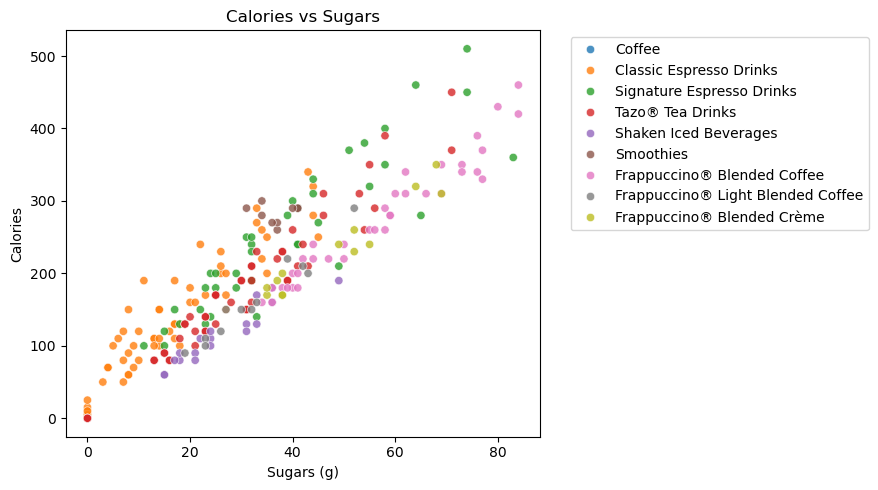

In [47]:
plt.figure(figsize=(9, 5))
sns.scatterplot(data=df, x='Sugars (g)', y='Calories', hue='Beverage_category',  alpha=0.8)
plt.title('Calories vs Sugars')
plt.xlabel('Sugars (g)')
plt.ylabel('Calories')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [49]:
# Pearson correlation between Calories and Sugars
from scipy import stats
mask = df[['Calories','Sugars (g)']].dropna()
r, p = stats.pearsonr(mask['Sugars (g)'], mask['Calories'])
r, p

(0.9096754266806335, 1.45874612595575e-93)

**Correlation:**  
- There is a very strong and statistically significant positive correlation between the two variables.
With r ≈ 0.91 and a virtually zero p-value, the relationship is not due to chance. This means the two variables move together very consistently across the dataset.

Size effect & Boxplot
======================

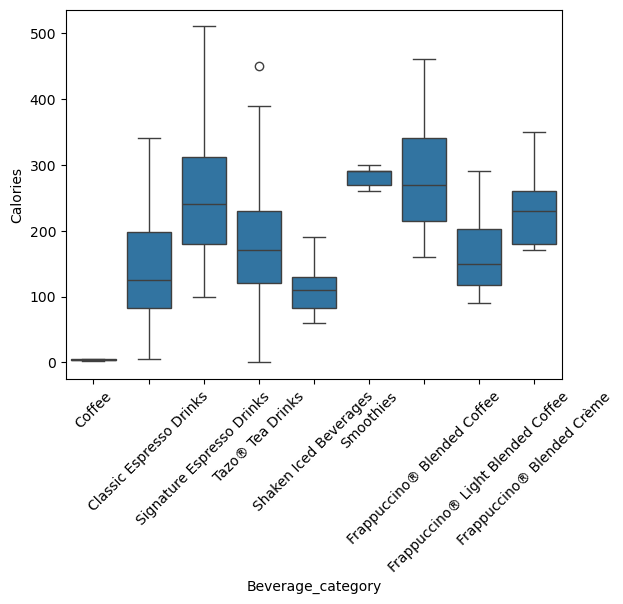

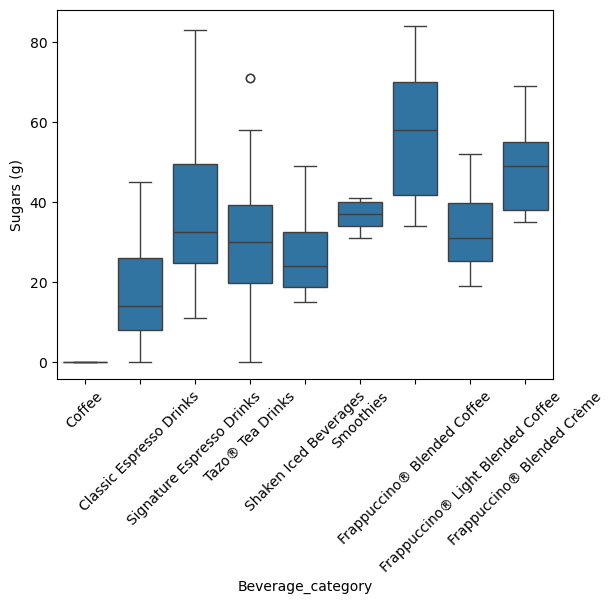

In [32]:
sns.boxplot(x='Beverage_category', y='Calories', data=df)
plt.xticks(rotation=45)
plt.show()

# Boxplot for Sugars
sns.boxplot(x='Beverage_category', y='Sugars (g)', data=df)
plt.xticks(rotation=45)
plt.show()

Category-level analysis
======================

In [33]:
df2=df.groupby('Beverage_category')[['Calories','Sugars (g)','Caffeine (mg)', 'Protein (g)']].mean().sort_values('Calories', ascending=False)
df2

,Calories,Sugars (g),Caffeine (mg),Protein (g)
Beverage_category,,,,
Smoothies,282.222222,36.777778,5.625000,17.111111
Frappuccino® Blended Coffee,276.944444,57.083333,101.805556,4.222222
Signature Espresso Drinks,250.000000,38.600000,73.875000,9.875000
Frappuccino® Blended Crème,233.076923,48.461538,0.000000,4.000000
Tazo® Tea Drinks,177.307692,30.307692,50.416667,6.807692
Frappuccino® Light Blended Coffee,162.500000,32.416667,99.583333,4.250000
Classic Espresso Drinks,140.172414,16.965517,122.068966,8.686207
Shaken Iced Beverages,114.444444,26.000000,128.846154,1.344444
Coffee,4.250000,0.000000,293.750000,0.700000


**Category trends:**  
- Categories such as Smoothies and Frappuccino Blended Coffee are highest on average.  
- Brewed coffee and tea categories are the lowest.

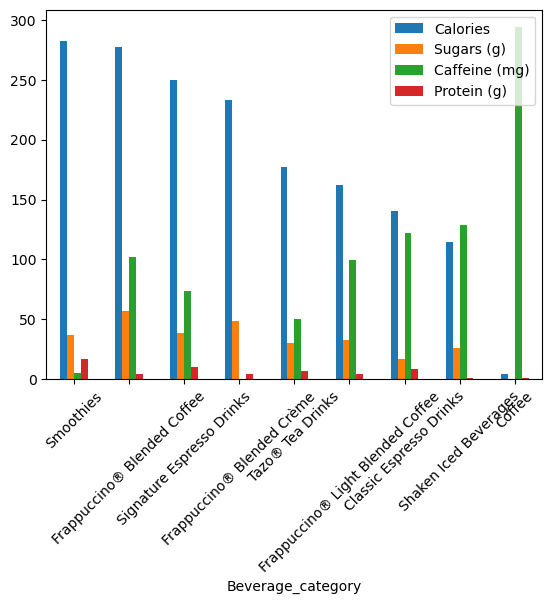

In [34]:
df2.plot(kind='bar', rot=45)
plt.show()

In [35]:
df3=df.groupby('Beverage_category')[['Caffeine (mg)']].mean().sort_values('Caffeine (mg)', ascending=True)
df3

,Caffeine (mg)
Beverage_category,
Frappuccino® Blended Crème,0.000000
Smoothies,5.625000
Tazo® Tea Drinks,50.416667
Signature Espresso Drinks,73.875000
Frappuccino® Light Blended Coffee,99.583333
Frappuccino® Blended Coffee,101.805556
Classic Espresso Drinks,122.068966
Shaken Iced Beverages,128.846154
Coffee,293.750000


<Axes: xlabel='Beverage_category'>

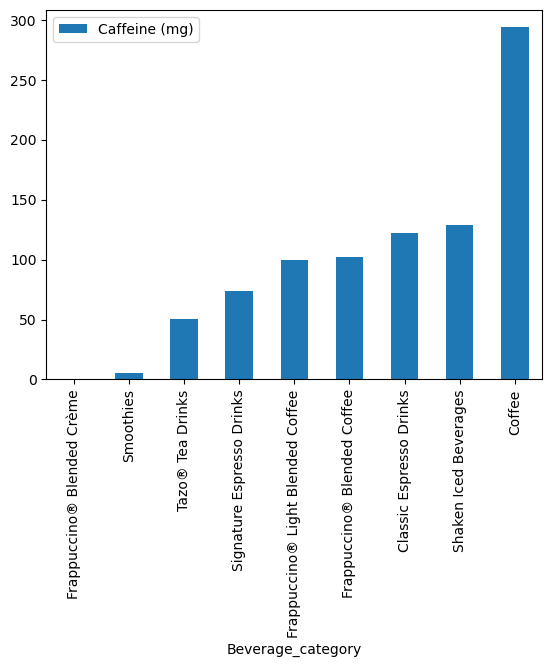

In [36]:
df3.plot(kind='bar')

In [37]:
df.groupby('Beverage')[['Calories','Sugars (g)','Caffeine (mg)']].mean().sort_values('Calories', ascending=False)

,Calories,Sugars (g),Caffeine (mg)
Beverage,,,
White Chocolate Mocha (Without Whipped Cream),330.000000,49.166667,112.500000
Java Chip (Without Whipped Cream),327.777778,62.444444,110.000000
Banana Chocolate Smoothie,290.000000,33.000000,15.000000
Strawberry Banana Smoothie,290.000000,40.666667,0.000000
Tazo® Green Tea Latte,275.000000,45.083333,67.500000
Mocha (Without Whipped Cream),272.222222,57.111111,113.333333
Caramel (Without Whipped Cream),268.888889,58.000000,100.000000
Orange Mango Banana Smoothie,266.666667,36.666667,5.000000
Strawberries & Crème (Without Whipped Cream),248.888889,51.555556,0.000000


In [38]:
# Top 10 highest-calorie specific beverages
df1=df.groupby('Beverage')['Calories'].mean().sort_values(ascending=False).head(10)
df1

Beverage
White Chocolate Mocha (Without Whipped Cream)    330.000000
Java Chip (Without Whipped Cream)                327.777778
Banana Chocolate Smoothie                        290.000000
Strawberry Banana Smoothie                       290.000000
Tazo® Green Tea Latte                            275.000000
Mocha (Without Whipped Cream)                    272.222222
Caramel (Without Whipped Cream)                  268.888889
Orange Mango Banana Smoothie                     266.666667
Strawberries & Crème (Without Whipped Cream)     248.888889
Caramel Apple Spice (Without Whipped Cream)      247.500000
Name: Calories, dtype: float64

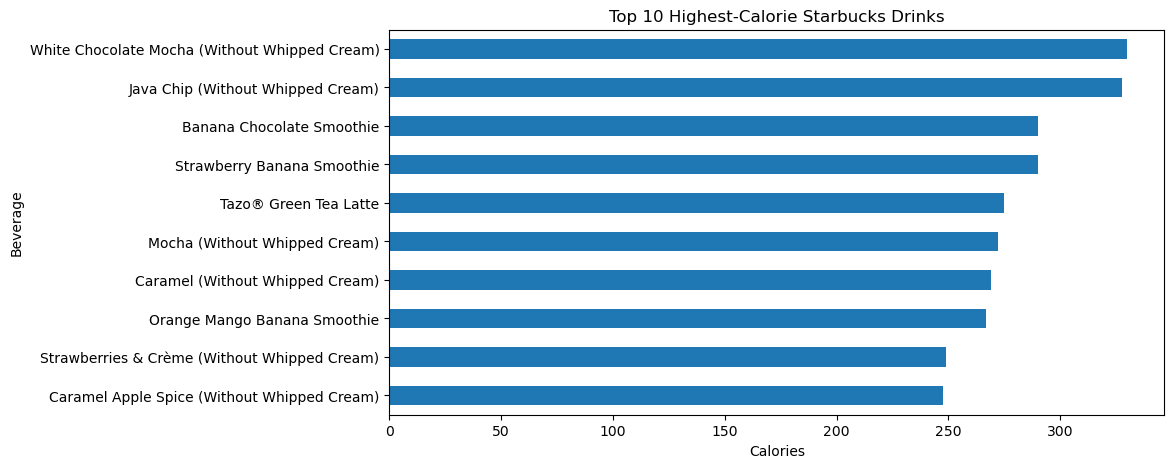

In [39]:
# Plot top10 as horizontal bar chart
df1.plot(kind='barh', figsize=(10, 5))
plt.title("Top 10 Highest-Calorie Starbucks Drinks")
plt.xlabel("Calories")
plt.ylabel("Beverage")
plt.gca().invert_yaxis()
plt.show()

**Top 10 Highest-Calorie Drinks**
The following beverages emerged as the highest-calorie options in the dataset:
- White Chocolate Mocha (Without Whipped Cream), Java Chip (Without Whipped Cream), Banana Chocolate Smoothie, Strawberry Banana Smoothie, Tazo® Green Tea Latte, Mocha (Without Whipped Cream), Caramel (Without Whipped Cream), Orange Mango Banana Smoothie, Strawberries & Crème (Without Whipped Cream), Caramel Apple Spice (Without Whipped Cream): these are the top calibrated offenders.
- In short, these top 10 drinks are calorie leaders because they combine sweetened bases, heavy syrups, dairy, and large portion sizes, creating a concentrated calorie profile.

Correlation heatmap
======================

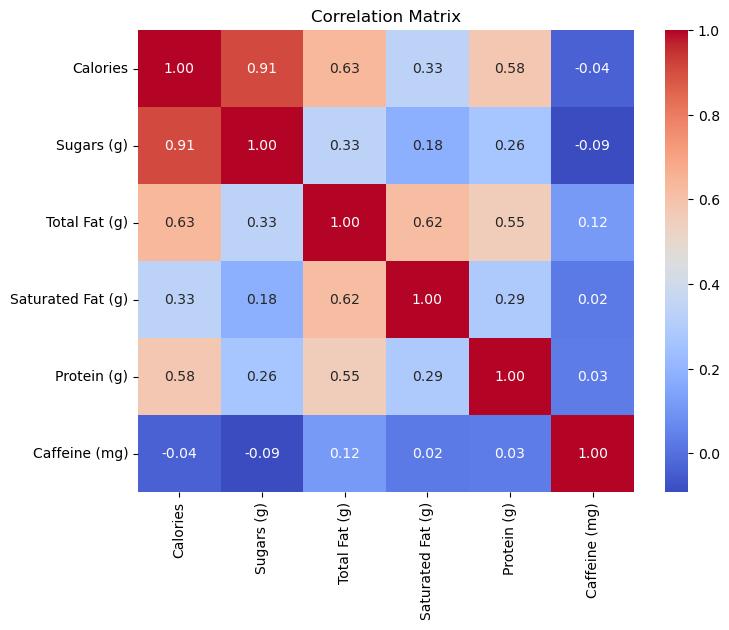

In [51]:
# Correlation heatmap for numeric features (select subset)
num_cols = ['Calories','Sugars (g)','Total Fat (g)','Saturated Fat (g)','Protein (g)','Caffeine (mg)']
corr = df[num_cols].corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In [41]:
df.columns

Index(['Beverage_category', 'Beverage', 'Beverage_prep', 'Calories',
       'Total Fat (g)', 'Trans Fat (g)', 'Saturated Fat (g)', 'Sodium (mg)',
       'Total Carbohydrates (g)', 'Cholesterol (mg)', 'Dietary Fibre (g)',
       'Sugars (g)', 'Protein (g)', 'Vitamin A (% DV)', 'Vitamin C (% DV)',
       'Calcium (% DV)', 'Iron (% DV)', 'Caffeine (mg)'],
      dtype='object')

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242 entries, 0 to 241
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Beverage_category        242 non-null    object 
 1   Beverage                 242 non-null    object 
 2   Beverage_prep            242 non-null    object 
 3   Calories                 242 non-null    int64  
 4   Total Fat (g)            241 non-null    float64
 5   Trans Fat (g)            242 non-null    float64
 6   Saturated Fat (g)        242 non-null    float64
 7   Sodium (mg)              242 non-null    int64  
 8   Total Carbohydrates (g)  242 non-null    int64  
 9   Cholesterol (mg)         242 non-null    int64  
 10  Dietary Fibre (g)        242 non-null    int64  
 11  Sugars (g)               242 non-null    int64  
 12  Protein (g)              242 non-null    float64
 13  Vitamin A (% DV)         242 non-null    int64  
 14  Vitamin C (% DV)         2

In [50]:
df.head()

,Beverage_category,Beverage,Beverage_prep,Calories,Total Fat (g),Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g),Vitamin A (% DV),Vitamin C (% DV),Calcium (% DV),Iron (% DV),Caffeine (mg)
0,Coffee,Brewed Coffee,Short,3,0.1,0.0,0.0,0,5,0,0,0,0.3,0,0,0,0.0,175.0
1,Coffee,Brewed Coffee,Tall,4,0.1,0.0,0.0,0,10,0,0,0,0.5,0,0,0,0.0,260.0
2,Coffee,Brewed Coffee,Grande,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0,0,0,0.0,330.0
3,Coffee,Brewed Coffee,Venti,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0,0,2,0.0,410.0
4,Classic Espresso Drinks,Caffè Latte,Short Nonfat Milk,70,0.1,0.1,0.0,5,75,10,0,9,6.0,10,0,20,0.0,75.0


Key findings & recommendations
======================

## Key Findings
- The menu is highly variable: Smoothies and Frappuccinos are the most calorie-dense categories.  
- **Sugar** shows a strong positive correlation with calories — it is a primary driver.  
- **Size** also increases calorie content substantially (Short → Tall → Grande → Venti).  
- Brewed coffee offers high caffeine with very low calories — recommended for health-conscious consumers seeking caffeine.

## Recommendations
1. **For customers:** choose brewed coffee or unsweetened teas for low calories; avoid large sizes and syrups.  
2. **For Starbucks (product team):** consider promoting lower-sugar alternatives, clearer sugar labeling, and reduced-sugar versions of top offenders.  

## Conclusion
The analysis supports the hypothesis that calorie content is primarily driven by sugar content and beverage size. The findings are actionable for consumers and stakeholders.

End Notebook
======================